# 中文文本自动化标签方法研究

导入scikit-learn库中的文本预处理类

In [57]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.manifold import TSNE

导入分词工具

In [10]:
import jieba

导入scikit-learn库中的聚类算法

In [58]:
from sklearn.cluster import KMeans

导入其它库

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import os 
import sys
import time
import random
from collections import Counter

获取文本以及文本标签

In [59]:
data_path = r'D:\textClassify\THUCNews'
topic_list = ['财经', '彩票', '房产', '股票', '家居', '教育', '科技', '社会', '时尚', '时政', '体育', '星座', '游戏', '娱乐']
corpus = []
true_labels = []

for i, topic in enumerate(topic_list):
    topic_dir = os.path.join(data_path, topic)
    filenames = os.listdir(topic_dir)[:-1]
    random.shuffle(filenames)
    for file in filenames[:1000]:
        corpus.append(open(os.path.join(topic_dir, file), encoding='utf-8').read())
        true_labels.append(i)

## 方案1：使用jieba分词，使用1-gram作为特征，然后计算tfidf权重

In [212]:
features = []
for text in corpus:
    features.append(' '.join(jieba.lcut(text)))

分词结果示例

In [213]:
index = random.sample(range(len(corpus)), 1)[0]
print('原文本：' + corpus[index])
print('分词后：' + features[index].replace(' ', '/'))

原文本：羊慧明：楼市泡沫危机已超07年
　　本报特约记者 谭丽莎 成都报道
　　“囤房炒楼将引发金融风险，这对社会和谐不利。”对房地产颇有研究的著名学者羊慧明如是说。以下是羊慧明接受记者采访时的对话实录。
　　记者：近两个月一线城市房价暴涨的同时，伴随的却是新房成交量环比全面下滑。对此，你怎么看？
　　羊慧明：房价越高，超过了当地的经济发展水平和大多数居民的承受能力，真正能买得起房子的人就越少，也就是有效需求越小。上海4万-7万/平米的豪宅不断推出，就是年收入 10万左右的中产阶层也少有人能问津。都是富人、炒家在炒，最终卖给谁呢？价涨量跌，是泡沫将破的变盘信号。
　　这几天我专门到成都的几个高档楼盘去观察，发现大多冷冷清清，偶尔有看客去问价，经了解都是手头有房子打算买来炒的人。内地楼市已经出现这样一个尴尬现象：许多没房子的人买不起也租不起房，所以房价暴涨租金却在下跌，有房子的人几套几十套上百套买来囤在那里不装修不住人不使用，就等着涨价炒卖。成都的银都花园、绿杨?是上世纪90年代建的小区，十几年了都还有没装修没使用的清水房在炒卖。 
　　中国今天的楼市已经变成一个类似期货市场的游戏场——正在脱离真实的民生需求状况，被人为哄抬炒高,成为悬在空中的楼阁。以京、沪、深、杭等一线城市为例，住宅地价已是美国大城市地价的几十倍，房价也已“超美赶英”，可涨势还在加速，“地王”不断刷新地价记录，北京楼价涨得“连开发商都害怕”。 
　　记者：现在，房地产业有泡沫了吗？
　　羊慧明：欧美的投资性购房要理性得多，制约机制也成熟一些。投资性购房一般不超过当期销售量的15%，人家卖的都是精装房，投资者买到房子后马上会入住或出租，实现其使用价值。而且租金收入足以支付按揭贷款，10年左右的租金收入就能收回购房投资，这才是正常的。而中国一线城市投资性购房比例超过40%，房价租金比超过50倍甚至100倍， 远远超过正常楼市的警戒线。内地的炒家，买了几套几十套上百套清水房，扔在那里不装修不出租不住人就拿来炒。必须要说的是，在我们这样一个发展中经济体，住房作为一种民生必需品，大量囤房哄抬房价对经济发展非常不利。
　　记者：房地产市场不健康会有什么后果？ 
　　羊慧明：纵容囤房炒楼哄抬房价将动摇房地产市场健康发展的基石，并对社会造成诸多危害。
　　首先是引发金融风险。囤房炒楼的人，多半也是用银行贷款。比如温

In [214]:
vectorizer = CountVectorizer(max_features=10000)
print(vectorizer)
X = vectorizer.fit_transform(features)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=10000, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)


词频排序前10000的词组

In [215]:
','.join(vectorizer.get_feature_names())

00,000,01,010,012,02,03,04,05,06,07,08,09,10,100,1000,10000,101,102,103,104,105,106,107,108,1080,1080p,109,11,110,1100,1100d,112,115,116,118,119,12,120,1200,123,125,128,13,130,1300,134,135,138,14,140,1400,15,150,1500,15000,16,160,1600,16000,165,168,17,170,1700,175,18,180,1800,18000,180etf,185,19,1980,1990,1992,1993,1995,1996,1997,1998,1999,20,200,2000,20000,2001,2002,2003,2004,2005,2006,2007,2008,2009,201,2010,2011,2012,2013,2015,2020,21,210,22,220,23,230,24,240,2400,25,250,2500,25000,26,260,2600,27,270,28,280,29,2d,2g,2gb,30,300,3000,31,310,32,320,3200,33,34,35,350,3500,36,360,3600,37,38,39,3d,3g,40,400,4000,41,42,43,44,45,450,4500,46,47,48,480,49,4g,4gb,50,500,5000,51,52,53,54,55,550,56,57,58,59,599,60,600,6000,61,62,63,64,65,650,66,67,68,69,70,700,7000,71,72,73,74,75,750,76,77,78,79,80,800,8000,81,82,83,84,85,86,87,88,89,90,900,9000,91,92,93,94,95,96,97,98,99,ac,aig,amd,and,android,are,as,at,a股,b2c,ban,be,bet365,blog,boss,bt,bwin,by,b股,can,cba,cbd,cbot,ccd,ceo,chinajoy,cj,cmos,cn,co

In [216]:
transformer = TfidfTransformer()
print(transformer)
tfidf = transformer.fit_transform(X)

TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True)


运行K-Means聚类算法

In [217]:
start = time.time()
model = KMeans(n_clusters=14).fit(tfidf)
end = time.time()
print('耗时：' + str(end-start) + 's')

耗时：443.2357153892517s


In [218]:
counts = []
for i in range(14):
    count = Counter(model.labels_[i*1000:(i+1)*1000])
    print('第%2d类：'%(i), end='')
    print(count)
    counts.append(count)

第 0类：Counter({3: 445, 6: 353, 1: 172, 13: 22, 8: 6, 9: 2})
第 1类：Counter({12: 478, 10: 316, 0: 93, 1: 91, 8: 10, 4: 6, 3: 2, 9: 2, 13: 2})
第 2类：Counter({2: 532, 1: 202, 13: 164, 3: 79, 8: 13, 9: 5, 11: 4, 6: 1})
第 3类：Counter({3: 571, 1: 382, 13: 29, 6: 14, 9: 1, 7: 1, 8: 1, 5: 1})
第 4类：Counter({13: 429, 11: 291, 1: 252, 9: 15, 3: 7, 8: 3, 4: 2, 0: 1})
第 5类：Counter({7: 612, 1: 281, 9: 56, 8: 45, 13: 2, 11: 2, 5: 2})
第 6类：Counter({1: 830, 13: 85, 3: 29, 8: 17, 4: 16, 11: 11, 9: 6, 0: 2, 6: 2, 5: 1, 7: 1})
第 7类：Counter({8: 776, 1: 203, 9: 9, 7: 8, 11: 2, 6: 1, 13: 1})
第 8类：Counter({11: 836, 1: 104, 9: 34, 13: 20, 8: 6})
第 9类：Counter({1: 907, 8: 68, 3: 10, 13: 8, 11: 3, 7: 1, 4: 1, 0: 1, 9: 1})
第10类：Counter({0: 817, 1: 169, 9: 7, 8: 6, 10: 1})
第11类：Counter({9: 584, 5: 351, 1: 51, 11: 11, 8: 2, 13: 1})
第12类：Counter({4: 687, 1: 257, 0: 19, 13: 12, 9: 12, 11: 6, 8: 5, 3: 1, 6: 1})
第13类：Counter({1: 821, 9: 86, 8: 42, 11: 39, 4: 4, 7: 4, 0: 2, 13: 1, 6: 1})


通过贪心方法选择各cluster对应的实际类别：

In [219]:
already_allocated = {}
n_correct = 0
while len(already_allocated.keys())<14:
    most_commons = []
    for count in counts:
        most_commons.append(count.most_common(1)[0])
    freq = np.array([ele[1] for ele in most_commons])
    true_label = freq.argmax()
    most_common = most_commons[true_label]
    if most_common[0] not in already_allocated and true_label not in already_allocated.values():
        already_allocated[most_common[0]] = true_label
        n_correct += most_common[1]
    counts[true_label].pop(most_common[0])
    if not bool(counts[true_label]):
        break

print('算法计算结果（聚类结果-实际类别）')
for key in already_allocated.keys():
    print('%2d-%2d'%(key, already_allocated[key]))
print('聚类正确率为：' + str(n_correct/14000))

算法计算结果
 1- 9
11- 8
 0-10
 8- 7
 4-12
 7- 5
 9-11
 3- 3
 2- 2
12- 1
13- 4
 6- 0
聚类正确率为：0.5415714285714286


## 方案2：不使用分词，以字为特征单位

In [220]:
vectorizer = CountVectorizer(analyzer='char')
print(vectorizer)
X = vectorizer.fit_transform(corpus)

CountVectorizer(analyzer='char', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)


所有特征单元

In [221]:
','.join(vectorizer.get_feature_names())

['\t', '\n', ' ', '!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '{', '|', '}', '~', '\x7f', '\xa0', '¥', '§', '¬', '\xad', '®', '°', '±', '·', '×', 'à', 'á', 'è', 'é', 'ê', 'ë', 'ì', 'ó', 'ö', '÷', 'ā', 'ē', 'ī', 'ǎ', 'α', 'β', 'γ', 'μ', 'ξ', 'ο', 'π', 'σ', 'ω', '\u200b', '—', '―', '‘', '’', '“', '”', '†', '•', '…', '‧', '‰', '※', '℃', '№', '™', 'ⅰ', 'ⅱ', 'ⅲ', 'ⅳ', 'ⅵ', '←', '↑', '→', '↓', '√', '∠', '∩', '∴', '∶', '∷', '≠', '≤', '≥', '⊙', '①', '②', '③', '④', '⑤', '⑥', '⑦', '⑧', '⑨', '⑩', '⑴', '⑵', '⑶', '⑷', '⑸', '⒈', '⒉', '⒊', '⒋', '⒌', '⒓', '─', '│', '┆', '■', '□', '▲', '△', '▶', '◀', '◆', '◇', '○', '◎', '●', '★', '☆', '♥', '♪', '\u3000', '、', '。', '〃', '〈', '〉', '《', '》', '『', '』', '【', '】', '〔', '〕', 'い', 'う', 'お

In [222]:
transformer = TfidfTransformer()
print(transformer)
tfidf = transformer.fit_transform(X)

TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True)


In [223]:
start = time.time()
model = KMeans(n_clusters=14).fit(tfidf)
end = time.time()
print('耗时：' + str(end-start) + 's')

耗时：1165.7645070552826s


In [224]:
counts = []
for i in range(14):
    count = Counter(model.labels_[i*1000:(i+1)*1000])
    print('第%2d类：'%(i), end='')
    print(count)
    counts.append(count)

第 0类：Counter({7: 430, 1: 316, 13: 179, 11: 48, 0: 10, 6: 8, 12: 8, 9: 1})
第 1类：Counter({4: 417, 2: 326, 10: 117, 13: 52, 6: 27, 11: 26, 0: 21, 1: 8, 12: 3, 5: 2, 9: 1})
第 2类：Counter({8: 545, 1: 299, 0: 43, 11: 33, 13: 32, 6: 29, 7: 8, 12: 6, 9: 4, 5: 1})
第 3类：Counter({13: 420, 7: 276, 1: 137, 11: 82, 12: 61, 0: 12, 6: 11, 9: 1})
第 4类：Counter({6: 522, 1: 329, 0: 57, 11: 35, 12: 34, 13: 19, 7: 2, 10: 1, 4: 1})
第 5类：Counter({9: 719, 0: 135, 12: 49, 11: 34, 6: 23, 1: 22, 13: 15, 5: 2, 3: 1})
第 6类：Counter({12: 310, 1: 236, 13: 157, 11: 121, 6: 87, 0: 48, 5: 22, 7: 14, 9: 4, 10: 1})
第 7类：Counter({11: 542, 0: 375, 1: 27, 6: 25, 9: 24, 12: 5, 7: 1, 10: 1})
第 8类：Counter({6: 736, 0: 118, 12: 110, 1: 14, 13: 11, 11: 9, 10: 1, 5: 1})
第 9类：Counter({11: 851, 1: 54, 0: 33, 6: 24, 12: 16, 9: 9, 13: 8, 5: 3, 10: 2})
第10类：Counter({10: 816, 11: 79, 0: 62, 12: 15, 6: 15, 2: 7, 13: 4, 1: 2})
第11类：Counter({0: 475, 3: 358, 6: 145, 13: 14, 12: 5, 11: 2, 1: 1})
第12类：Counter({5: 592, 12: 217, 6: 70, 0: 51, 11: 

In [225]:
already_allocated = {}
n_correct = 0
while len(already_allocated.keys())<14:
    most_commons = []
    for count in counts:
        most_commons.append(count.most_common(1)[0])
    freq = np.array([ele[1] for ele in most_commons])
    true_label = freq.argmax()
    most_common = most_commons[true_label]
    if most_common[0] not in already_allocated and true_label not in already_allocated.values():
        already_allocated[most_common[0]] = true_label
        n_correct += most_common[1]
    counts[true_label].pop(most_common[0])
    if not bool(counts[true_label]):
        break

print('算法计算结果（聚类结果-实际类别）')
for key in already_allocated.keys():
    print('%2d-%2d'%(key, already_allocated[key]))
print('聚类正确率为：' + str(n_correct/14000))

算法计算结果（聚类结果-实际类别）
11- 9
10-10
 6- 8
 9- 5
 5-12
 8- 2
 0-11
 7- 0
13- 3
 4- 1
 1- 4
12- 6
聚类正确率为：0.4742857142857143


## 方案3：还是以字为特征单位，同时加入bigram特征

In [228]:
vectorizer = CountVectorizer(analyzer='char', ngram_range=(1,2), max_features=10000)
print(vectorizer)
X = vectorizer.fit_transform(corpus)
print(X)

CountVectorizer(analyzer='char', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=10000, min_df=1,
                ngram_range=(1, 2), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)


<14000x10000 sparse matrix of type '<class 'numpy.int64'>'
	with 7549569 stored elements in Compressed Sparse Row format>

In [230]:
','.join(vectorizer.get_feature_names())

'\n,\n我,\n欢, , (, -, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, >, [, a, b, c, d, e, f, g, h, i, j, k, l, m, n, o, p, q, r, s, t, u, v, w, y, “, │, ■, ●, 《, 【, 一, 三, 上, 下, 不, 与, 专, 东, 两, 中, 为, 主, 事, 二, 五, 人, 今, 从, 他, 以, 但, 作, 你, 全, 公, 关, 其, 出, 分, 刘, 前, 北, 华, 南, 卡, 去, 双, 发, 受, 另, 可, 同, 周, 和, 四, 因, 国, 图, 在, 地, 基, 多, 大, 天, 奥, 女, 如, 学, 实, 客, 家, 对, 导, 小, 就, 尽, 巴, 市, 平, 年, 广, 开, 张, 当, 德, 总, 成, 我, 户, 报, 据, 推, 文, 新, 日, 时, 昨, 更, 最, 有, 本, 李, 杨, 样, 根, 欧, 此, 每, 比, 水, 法, 活, 海, 点, 然, 爱, 特, 独, 王, 现, 由, 白, 目, 相, 第, 红, 约, 经, 编, 网, 美, 考, 而, 联, 自, 英, 蓝, 虽, 西, 记, 该, 财, 赵, 近, 这, 通, 那, 金, 阿, 陈, 除, 随, 首, 马, 高, 黄, ，,",%,% ,%),%、,%。,%以,%和,%左,%的,%至,%，,%；,&,\',(,( ,(0,(1,(2,(3,(4,(6,(a,(b,(c,(m,(s,(中,(含,(图,(微,(本,(约,(组,(编,(记,(论,),) ,)(,)2,)、,)。,)和,)在,)的,)，,)：,)；,*,+,,,, ,,0,-,- ,--,-0,-1,-2,-3,-4,-5,-6,-7,-8,-9,-h,-s,.,. ,..,.0,.1,.2,.3,.4,.5,.6,.7,.8,.9,.c,.h,.s,/,//,/0,/1,/2,/3,/半,/吨,/平,/文,0,0 ,0%,0(,0),0-,0.,0/,00,01,02,03,04,05,06,07,08,09,0:,0m,0、,0。,0万,0个,0人,0亿,0余,0元,0公,0分,0名,0后,0多,0天,0家,0岁,0平,0年,0指,0日,0月,0期,0比,0点,0的,0米

In [231]:
transformer = TfidfTransformer()
print(transformer)
tfidf = transformer.fit_transform(X)

TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True)


In [232]:
start = time.time()
model = KMeans(n_clusters=14).fit(tfidf)
end = time.time()
print('耗时：' + str(end-start) + 's')

耗时：2417.640973329544s


In [233]:
counts = []
for i in range(14):
    count = Counter(model.labels_[i*1000:(i+1)*1000])
    print('第%2d类：'%(i), end='')
    print(count)
    counts.append(count)

第 0类：Counter({5: 488, 0: 349, 2: 130, 1: 22, 13: 4, 6: 4, 3: 2, 7: 1})
第 1类：Counter({11: 484, 10: 288, 8: 107, 2: 47, 6: 43, 1: 21, 3: 5, 5: 2, 7: 1, 9: 1, 13: 1})
第 2类：Counter({12: 548, 2: 223, 5: 128, 1: 81, 3: 12, 13: 6, 7: 2})
第 3类：Counter({5: 732, 2: 158, 13: 55, 1: 24, 6: 23, 0: 6, 7: 1, 3: 1})
第 4类：Counter({3: 518, 2: 328, 1: 84, 13: 34, 5: 26, 6: 9, 8: 1})
第 5类：Counter({7: 717, 1: 138, 2: 71, 13: 47, 3: 13, 6: 9, 5: 3, 9: 1, 4: 1})
第 6类：Counter({6: 326, 2: 320, 13: 165, 1: 70, 5: 66, 3: 32, 9: 15, 0: 3, 7: 2, 8: 1})
第 7类：Counter({1: 519, 2: 439, 7: 24, 3: 10, 13: 5, 5: 1, 0: 1, 8: 1})
第 8类：Counter({3: 734, 13: 114, 1: 109, 2: 32, 6: 9, 8: 1, 9: 1})
第 9类：Counter({2: 911, 1: 39, 13: 17, 5: 10, 3: 8, 7: 8, 8: 3, 9: 2, 6: 2})
第10类：Counter({8: 828, 2: 88, 1: 60, 13: 14, 6: 4, 10: 3, 3: 2, 5: 1})
第11类：Counter({1: 411, 4: 356, 3: 224, 13: 4, 6: 3, 2: 2})
第12类：Counter({9: 622, 13: 204, 1: 58, 2: 48, 3: 33, 6: 20, 8: 11, 5: 3, 11: 1})
第13类：Counter({1: 477, 2: 333, 3: 124, 13: 50, 9: 8, 

In [234]:
already_allocated = {}
n_correct = 0
while len(already_allocated.keys())<14:
    most_commons = []
    for count in counts:
        most_commons.append(count.most_common(1)[0])
    freq = np.array([ele[1] for ele in most_commons])
    true_label = freq.argmax()
    most_common = most_commons[true_label]
    if most_common[0] not in already_allocated and true_label not in already_allocated.values():
        already_allocated[most_common[0]] = true_label
        n_correct += most_common[1]
    counts[true_label].pop(most_common[0])
    if not bool(counts[true_label]):
        break

print('算法计算结果（聚类结果-实际类别）')
for key in already_allocated.keys():
    print('%2d-%2d'%(key, already_allocated[key]))
print('聚类正确率为：' + str(n_correct/14000))

算法计算结果（聚类结果-实际类别）
 2- 9
 8-10
 3- 8
 5- 3
 7- 5
 9-12
12- 2
 1- 7
11- 1
 4-11
 0- 0
 6- 6
13-13
聚类正确率为：0.5125714285714286


## 改进思路
文本数据一共有14类，数量太高，在监督学习中可以成功识别，但在无监督学习中，成功识别的难度较大，接下来仅考虑4类数据：财经、教育、体育、游戏

不使用jieba分词，直接以字为特征单位，gram范围为(1,4)，由于总特征数时百万级别的，因此我们仅保留频率排前10000的特征。

In [60]:
topic_list = ['财经', '教育', '体育', '游戏']
corpus = []
true_labels = []

for i, topic in enumerate(topic_list):
    topic_dir = os.path.join(data_path, topic)
    filenames = os.listdir(topic_dir)[:-1]
    random.shuffle(filenames)
    for file in filenames[:1000]:
        corpus.append(open(os.path.join(topic_dir, file), encoding='utf-8').read())
        true_labels.append(i)

In [428]:
vectorizer = CountVectorizer(max_features=10000, ngram_range=(1,4), max_df=0.95, min_df=2, analyzer='char')
print(vectorizer)
X = vectorizer.fit_transform(corpus)
X

CountVectorizer(analyzer='char', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=0.95, max_features=10000, min_df=2,
                ngram_range=(1, 4), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)


<4000x10000 sparse matrix of type '<class 'numpy.int64'>'
	with 2671091 stored elements in Compressed Sparse Row format>

In [429]:
','.join(vectorizer.get_feature_names())

'\n, (, -, 0, 09, 1, 1 , 1 人, 1., 10, 11, 12, 19, 1、, 2, 2 , 2 人, 2., 20, 200, 201, 2、, 3, 3., 3、, 4, 4., 5, 6, 7, 8, 9, [, a, a , an, and, ar, as, b, be, c, ca, ch, co, d, e, f, fo, for, g, ga, gam, h, ha, he, i, in, in , is, is , it, j, l, le, li, m, ma, mo, n, no, o, of, of , on, p, pa, pr, pro, r, re, s, sh, so, st, t, te, th, tha, the, to, to , u, v, w, wa, we, wh, wi, wo, y, yo, you, “, “我, ■, □, ●, 《, 【, 一, 一、, 三, 上, 上海, 不, 不过, 不过，, 与, 专, 专家, 中, 中国, 为, 主, 事, 二, 二、, 人, 人 , 人 0, 今, 今年, 从, 他, 以, 但, 作, 作为, 全, 公, 关, 关于, 其, 刘, 前, 北, 北京, 华, 另, 另外, 另外，, 同, 周, 四, 因, 国, 在, 基, 基金, 大, 天, 如, 如果, 学, 对, 对于, 小, 尽, 尽管, 广, 张, 当, 我, 我要, 我要评, 据, 据了, 据了解, 据悉, 据悉，, 数, 文, 新, 新浪, 新浪体, 日, 昨, 昨日, 更, 更多, 更多信, 最, 有, 本, 本报, 本报讯, 本报记, 李, 根, 根据, 此, 此外, 此外，, 每, 比, 活, 活动, 游, 游戏, 特, 特别, 特别说, 王, 现, 由, 由于, 电, 目, 目前, 相, 第, 第一, 第三, 第二, 答, 经, 网, 美, 美国, 老, 考, 考研, 而, 自, 英, 虽, 虽然, 记, 记者, 证, 近, 这, 金, 问, 问：, 阿, 除, 除了, 随, 随着, 首, 高, 高考, 黄,",%,% ,%),%、,%。,%。 ,%以,%以上,%和,%左,%左右,%的,%，,%；,\',(,(1,(2,(2),(20,(201,(3,(4,(6,(c,(w,(

In [430]:
transformer = TfidfTransformer()
print(transformer)
tfidf = transformer.fit_transform(X)

TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True)


In [431]:
start = time.time()
model = KMeans(n_clusters=len(topic_list)).fit(tfidf)
end = time.time()
print('耗时：' + str(end-start) + 's')

耗时：182.11415767669678s


In [432]:
counts = []
for i in range(len(topic_list)):
    count = Counter(model.labels_[i*1000:(i+1)*1000])
    print('第%2d类：'%(i), end='')
    print(count)
    counts.append(count)

第 0类：Counter({3: 973, 0: 17, 1: 10})
第 1类：Counter({2: 849, 0: 78, 1: 51, 3: 22})
第 2类：Counter({1: 985, 0: 13, 2: 2})
第 3类：Counter({0: 967, 1: 17, 3: 11, 2: 5})


In [433]:
already_allocated = {}
n_correct = 0
while len(already_allocated.keys()) < len(topic_list):
    most_commons = []
    for count in counts:
        if count:
            most_commons.append(count.most_common(1)[0])
        else:
            most_commons.append((None, 0))
    freq = np.array([ele[1] for ele in most_commons])
    true_label = freq.argmax()
    most_common = most_commons[true_label]
    if most_common[0] not in already_allocated and true_label not in already_allocated.values():
        already_allocated[most_common[0]] = true_label
        n_correct += most_common[1]
    counts[true_label].pop(most_common[0])


print('算法计算结果（聚类结果-实际类别）')
for key in already_allocated.keys():
    print('%2d-%2d'%(key, already_allocated[key]))
print('聚类正确率为：' + str(n_correct/len(corpus)))

算法计算结果（聚类结果-实际类别）
 1- 2
 3- 0
 0- 3
 2- 1
聚类正确率为：0.9435


### 特征可视化

In [437]:
start = time.time()
emb = TSNE(n_components=2).fit_transform(tfidf.toarray())
end = time.time()
print('耗时：' + str(end-start) + 's')

耗时：260.75784182548523s


实际类别图

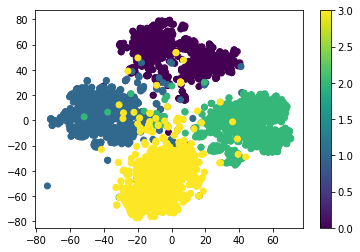

In [438]:
plt.scatter(emb[:, 0], emb[:, 1], c=true_labels)
plt.colorbar()
plt.show()

聚类类别图

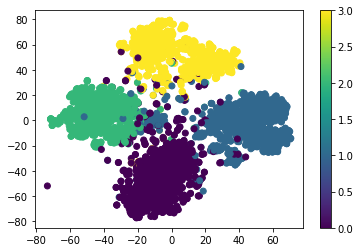

In [439]:
plt.scatter(emb[:, 0], emb[:, 1], c=model.labels_)
plt.colorbar()
plt.show()

## 未来的方案：使用深度学习技术
### 1.使用bert模型提取文本的特征向量
相关细节参考该链接：https://github.com/google-research/bert

这里只介绍下大致流程，如下：
* 下载预训练好的中文模型，链接：https://storage.googleapis.com/bert_models/2018_11_03/chinese_L-12_H-768_A-12.zip （需要科学上网才能下载）
* 下载bert库中的源码，地址：https://github.com/google-research/bert
* 在bert目录下运行命令：
```
python extract_features.py \
  --input_file=/tmp/input.txt \
  --output_file=/tmp/output.jsonl \
  --vocab_file=$BERT_BASE_DIR/vocab.txt \
  --bert_config_file=$BERT_BASE_DIR/bert_config.json \
  --init_checkpoint=$BERT_BASE_DIR/bert_model.ckpt \
  --layers=-1,-2,-3,-4 \
  --max_seq_length=128 \
  --batch_size=8
```

需要注意的是运行该脚本时无法根据屏幕上输出的信息找到对应的错误，本人踩过的一些坑如下：
* max_seq_length参数不能超过512
* input_file参数指定的文本文件中间不能存在空格（而windows系统支持文件命名中存在空格）

In [38]:
#财经, 教育, 体育, 游戏 对应的下标分别是0，5，10，12
target_indexs = [0, 5, 10, 12]
bert_feature_path = r'D:\textClassify\bert\data_features'
files = os.listdir(bert_feature_path)
features = []
for index in target_indexs:
    files_ = files[index*1000:(index+1)*1000]
    random.shuffle(files_)
    for file in files_[:30]:
        content = eval(open(os.path.join(bert_feature_path, file)).read().strip())
        feature = []
        for ele in content['features']:
            feature.extend(ele['layers'][0]['values'])
        features.append(feature)

通过补零操作让所有文本的特征维数一样，顺便生成标签列表

In [39]:
max_dims = 512 * 768
labels = []
for i, feature in enumerate(features):
    labels.append(i//30)
    while len(feature) < max_dims:
        feature.append(0)

In [40]:
start = time.time()
emb = TSNE(n_components=2).fit_transform(features)
end = time.time()
print('耗时：' + str(end-start) + 's')

耗时：5.03877067565918s


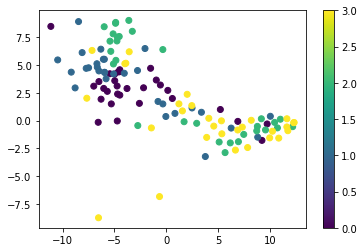

In [41]:
plt.scatter(emb[:, 0], emb[:, 1], c=labels)
plt.colorbar()
plt.show()

结果显示bert提取的特征不太好区分各个类别，对这个结果的分析如下：
* bert模型适合监督学习，因为之前bert模型在大多数NLP任务（监督学习任务）上都占据了榜单的第一名，用bert预训练模型提取的特征为基础，然后在自己的训练数据集上进行微调，已经被证明是非常有效的
* 如何将bert模型提取的特征用于无监督学习是个难点，bert模型输出的是文本中每个token的向量（768维），目前用的是直接拼接的方法，要想获得更加具备区分度的特征，可以考虑使用自编码器对其进行降维，自编码器需要使用到卷积模块（CNN）或循环模块（RNN）
* 最后需要说的是，尽管上述难点都解决了，使用bert进行自动化标签还是不太现实，因为bert模型太大，计算时间较长，生成14000条文本的特征耗时48个小时以上（GTX1660Ti显卡），且耗费存储空间，14000条文本的特征消耗100G的空间

### 2.使用自编码器技术提取文本特征
参考sequence to sequence的模型结构（如下图）
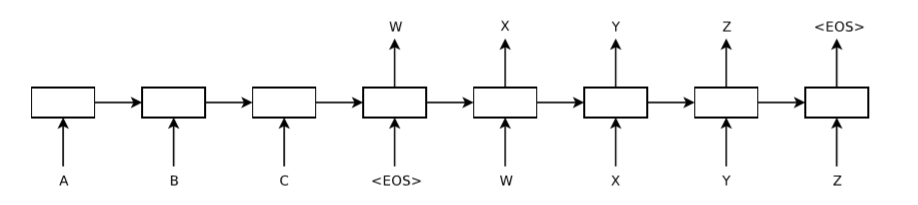
* 不同于监督学习的是，这里的输出就是输入，即输入文本：“我是杨珉”，目标输出就是：“我是杨珉”
* 先在语料库上训练模型，然后将待获取特征的文本输入到模型中，模型中encoder的输出即该文本的特征向量

In [48]:
autoencoder_features_path = r'D:\textClassify\autoencoder\src\features_rnn.npy'
features_rnn = np.load(autoencoder_features_path)
features = []
for index in target_indexs:
    features.extend(features_rnn[index*1000:(index+1)*1000])

In [53]:
start = time.time()
emb = TSNE(n_components=2).fit_transform(features)
end = time.time()
print('耗时：' + str(end-start) + 's')

耗时：48.5155565738678s


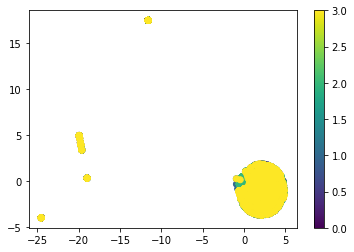

In [54]:
labels = []
for i, _ in enumerate(features):
    labels.append(i//1000)
plt.scatter(emb[:, 0], emb[:, 1], c=labels)
plt.colorbar()
plt.show()

结果显示提取的文本特征根本无法区分各个类别，要想获得具备区分度的文本特征，还需深入研究一下自编码器的相关技术，通过改进自编码器的网络结构来提升自动标签的准确率。

## 结论
初步研究结果表明使用词袋模型提取特征，然后使用tf-idf计算特征权重能获得最具备区分度的文本特征。而使用深度学习的两个方案（使用bert预训练模型提取文本特征和用自编码器提取文本特征）的初步结果并不理想，需要进一步的研究及改进。